# Building a Two Layer Neural Network in TensorFlow

Use built-in Deep Learning Classifier

## Recall our Spiral Dataset

from earlier today

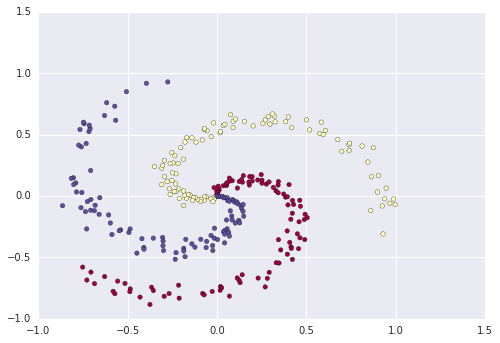

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # points per class
D = 2 # dimensionality at 2 so we can eyeball it
K = 3 # number of classes

X = np.zeros((N*K, D)) # generate an empty matrix to hold X features
y = np.zeros(N*K, dtype='int32') # switching this to int32 

# for 3 classes, evenly generates spiral arms
for j in xrange(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) #radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=plt.cm.Spectral)
plt.show()

## TensorFlow

Let's create a DNNClassifier using TF's built-in classifier, and evaluate its accuracy. 

In [24]:
import tensorflow as tf

# what should the classifier expect in terms of features
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=D)]

# defining the actual classifier 
dnn_spiral_classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            activation_fn = tf.nn.softmax, # softmax activation 
                                            optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01),  #GD with LR of 0.01
                                            hidden_units = [10],  # one hidden layer, containing 10 neurons
                                            n_classes = K, # K target classes 
                                            model_dir="/tmp/spiral_model") # directory for saving model checkpoints

# turn data into tensors to feed into the computational graph
# honestly input_fn could also handle these as np.arrays but this is here to show you that the tf.constant operation can run on np.array input
def get_inputs(): 
  X_tensor = tf.constant(X)
  y_tensor = tf.constant(y)
  return X_tensor, y_tensor

# fit the model
dnn_spiral_classifier.fit(input_fn=get_inputs, steps=200)

# interestingsly, you can continue training the model by continuing to call fit
dnn_spiral_classifier.fit(input_fn=get_inputs, steps=300)


#evaluating the accuracy 
accuracy_score = dnn_spiral_classifier.evaluate(input_fn=get_inputs, 
                                               steps=1)["accuracy"]

print("\n Accuracy: {0:f}\n".format(accuracy_score))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb9cfc96810>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 2001 into /tmp/spiral_model

## Notice the following:

The higher level library vastly simplied the following mechanics:

1. tf.session management
2. training the model 
3. running evaluation loops
4. feeding data into the model
5. generating predictions from the model
6. saving the model in a checkpoint file

For most use cases, it's likely that the many common models built into to tf will be able to solve your problem. You'll have to do model tuning by figuring out the correct parameters. Building your computational graph node by doing isn't likely needed unless you're doing academic research or working with very specialized datasets where default performance plataues.'

## Look at the checkpoints
Poke inside the /tmp/spiral_model/ directory to see how the checkpoint data is stored. What's contained in these files?

In [14]:
%ls '/tmp/spiral_model/'

checkpoint
eval/
events.out.tfevents.1499589900.datalab-server-ldln8
events.out.tfevents.1499589903.datalab-server-ldln8
events.out.tfevents.1499589929.datalab-server-ldln8
events.out.tfevents.1499589932.datalab-server-ldln8
graph.pbtxt
model.ckpt-1000.data-00000-of-00001
model.ckpt-1000.index
model.ckpt-1000.meta
model.ckpt-500.data-00000-of-00001
model.ckpt-500.index
model.ckpt-500.meta
model.ckpt-501.data-00000-of-00001
model.ckpt-501.index
model.ckpt-501.meta
model.ckpt-700.data-00000-of-00001
model.ckpt-700.index
model.ckpt-700.meta
model.ckpt-701.data-00000-of-00001
model.ckpt-701.index
model.ckpt-701.meta


## Predicting on a new value

Let's classify a new point

In [28]:
def new_points():
  return np.array([[1.0, 1.0],
                 [-1.5, -1.0]], dtype = np.int32)

predictions = list(dnn_spiral_classifier.predict(input_fn=new_points))

print(
    "New Samples, Class Predictions:    {}\n"
    .format(predictions))

New Samples, Class Predictions:    [1, 0]



## Digging into the DNNClassifier

The DNNClassifier is one fo the (Estimators)[https://www.tensorflow.org/api_guides/python/contrib.learn#Estimators] available in the tf.contrib.learn libary. Other estimators include: 

* KMeansClustering
* DNNRegressor
* LinearClassifier
* LinearRegressor
* LogisticRegressor

Each one of these can perform various actions on the graph, including: 

* evaluate 
* infer 
* train

Each one of these can read in batched input data with types including:

* pandas data
* real values columns from an input
* real valued columns from an input function (what we used above) 
* batches

Keep an eye on the documentation and updates. TensorFlow is under constant development. Things change very quickly! 

In [ ]:
# watch out for this, tf.classifier.evaluate is going to be deprecated, so keep an eye out for a long-term solution to calculating accuracy
accuracy_score = dnn_spiral_classifier.evaluate(input_fn=get_inputs, 
                                               steps=1)["accuracy"]

# Exercises

Get into the (TensorFlow API docs)[https://www.tensorflow.org/api_docs/python/tf]. Try the following and see how it impacts the final scores

1. Change the activation function to a ReLU 
2. Change the optimization function to stochastic gradient descent, then change it again to Adagrad
3. Add more steps to training
4. Add more layers
5. Increase the number of neurons in each hidden layer
6. Change the learning rate to huge and tiny values


/


### Gold Star Challenge

Reimplement the Spiral Classifier as a 2 Layer Neural Network in TensorFlow Core 

In [ ]:
# sample code to use for the gold star challenge from https://www.tensorflow.org/get_started/get_started 

import numpy as np
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x:x_train, y:y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))